In [17]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

RHC
SA
GA
MIMIC


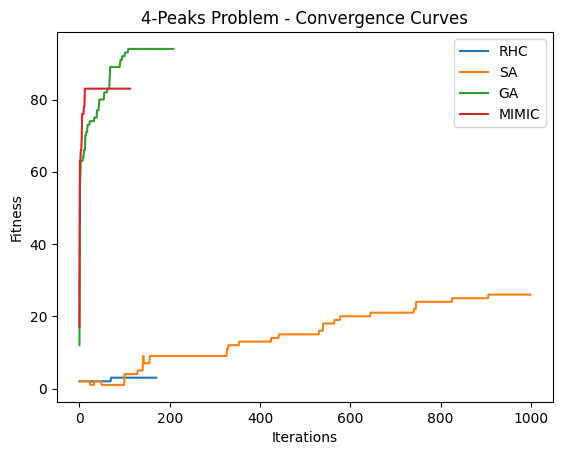

In [4]:
# 问题定义
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)

# 优化算法参数
max_iters = 1000
max_attempts = 100

# RHC
best_state_rhc, best_fitness_rhc, curve_rhc = mlrose_hiive.random_hill_climb(problem,
                                                                             max_attempts=max_attempts, 
                                                                             max_iters=max_iters, 
                                                                             curve=True,
                                                                             random_state=1)

print('RHC')
# SA
schedule = mlrose_hiive.ExpDecay()
best_state_sa, best_fitness_sa, curve_sa = mlrose_hiive.simulated_annealing(problem,
                                                                             schedule=schedule,
                                                                             max_attempts=max_attempts,
                                                                             max_iters=max_iters,
                                                                             curve=True,
                                                                             random_state=1)

print('SA')
# GA
best_state_ga, best_fitness_ga, curve_ga = mlrose_hiive.genetic_alg(problem,
                                                                    pop_size=200,
                                                                    mutation_prob=0.1,
                                                                    max_attempts=max_attempts,
                                                                    max_iters=max_iters,
                                                                    curve=True,
                                                                    random_state=1)

print('GA')
# MIMIC
best_state_mimic, best_fitness_mimic, curve_mimic = mlrose_hiive.mimic(problem,
                                                                       pop_size=200,
                                                                       keep_pct=0.2,
                                                                       max_attempts=max_attempts,
                                                                       max_iters=max_iters,
                                                                       curve=True,
                                                                       random_state=1)

print('MIMIC')

# 绘制收敛曲线
plt.figure()
plt.plot(curve_rhc[:,0], label='RHC')
plt.plot(curve_sa[:,0], label='SA')
plt.plot(curve_ga[:,0], label='GA')
plt.plot(curve_mimic[:,0], label='MIMIC')
plt.title('4-Peaks Problem - Convergence Curves')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()

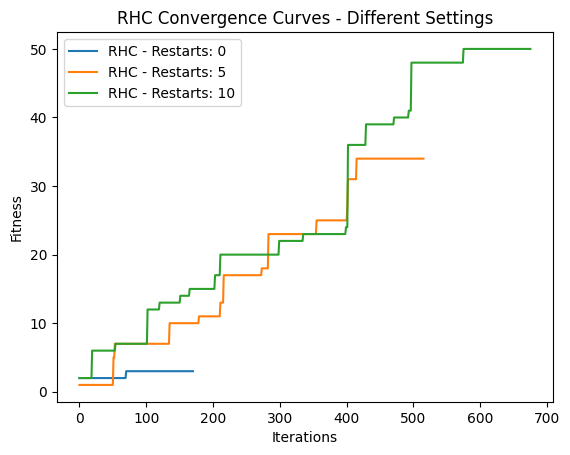

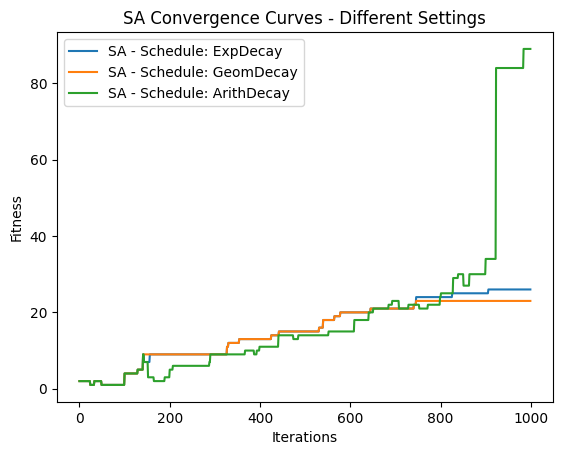

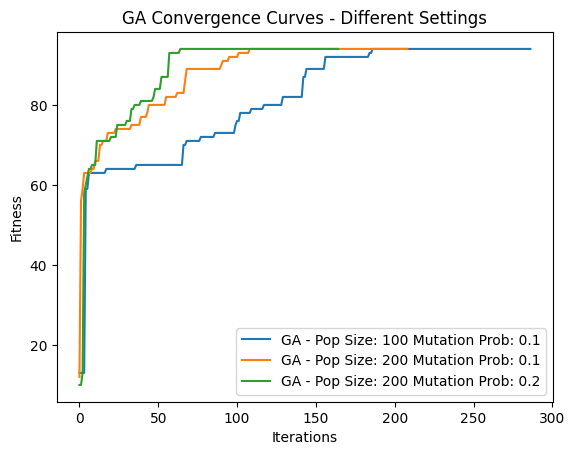

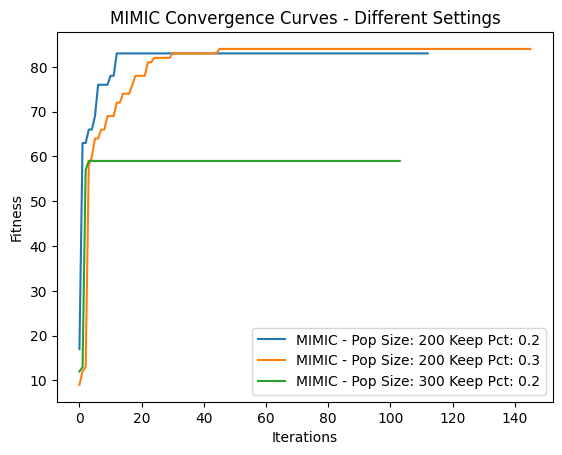

In [5]:
def plot_convergence_curves(problem, algorithm, param_grid, max_iters=1000, max_attempts=100):
    plt.figure()
    for params in param_grid:
        # 复制问题实例
        problem_copy = mlrose_hiive.DiscreteOpt(length=problem.length, 
                                                fitness_fn=problem.fitness_fn,
                                                maximize=problem.maximize,
                                                max_val=problem.max_val)
        
        # 应用算法和参数
        if algorithm == 'rhc':
            _, _, curve = mlrose_hiive.random_hill_climb(problem_copy,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         restarts=params['restarts'],
                                                         curve=True,
                                                         random_state=params['random_state'])
            label = f"RHC - Restarts: {params['restarts']}"
            
        elif algorithm == 'sa':
            _, _, curve = mlrose_hiive.simulated_annealing(problem_copy,
                                                           max_attempts=max_attempts,
                                                           max_iters=max_iters,
                                                           schedule=params['schedule'],
                                                           curve=True,
                                                           random_state=params['random_state'])
            label = f"SA - Schedule: {params['schedule'].__class__.__name__}"
            
        elif algorithm == 'ga':
            _, _, curve = mlrose_hiive.genetic_alg(problem_copy,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   pop_size=params['pop_size'],
                                                   mutation_prob=params['mutation_prob'],
                                                   curve=True,
                                                   random_state=params['random_state'])
            label = f"GA - Pop Size: {params['pop_size']} Mutation Prob: {params['mutation_prob']}"
            
        elif algorithm == 'mimic':
            _, _, curve = mlrose_hiive.mimic(problem_copy,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             pop_size=params['pop_size'],
                                             keep_pct=params['keep_pct'],
                                             curve=True,
                                             random_state=params['random_state'])
            label = f"MIMIC - Pop Size: {params['pop_size']} Keep Pct: {params['keep_pct']}"
        
        # 绘制收敛曲线
        plt.plot(curve[:, 0], label=label)
    
    plt.title(f'{algorithm.upper()} Convergence Curves - Different Settings')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()

# 为每个算法定义不同的参数设置
rhc_param_grid = [{'restarts': r, 'random_state': 1} for r in [0, 5, 10]]
sa_param_grid = [{'schedule': s, 'random_state': 1} 
                 for s in [mlrose_hiive.ExpDecay(), mlrose_hiive.GeomDecay(), mlrose_hiive.ArithDecay()]]
ga_param_grid = [{'pop_size': p, 'mutation_prob': mp, 'random_state': 1} 
                 for p, mp in [(100, 0.1), (200, 0.1), (200, 0.2)]]
mimic_param_grid = [{'pop_size': p, 'keep_pct': kp, 'random_state': 1} 
                    for p, kp in [(200, 0.2), (200, 0.3), (300, 0.2)]]

# 绘制每种算法的收敛曲线图
plot_convergence_curves(problem, 'rhc', rhc_param_grid)
plot_convergence_curves(problem, 'sa', sa_param_grid)
plot_convergence_curves(problem, 'ga', ga_param_grid)
plot_convergence_curves(problem, 'mimic', mimic_param_grid)

RHC Best Fitness: 99.0
SA Best Fitness: 99.0
GA Best Fitness: 95.0
MIMIC Best Fitness: 55.0


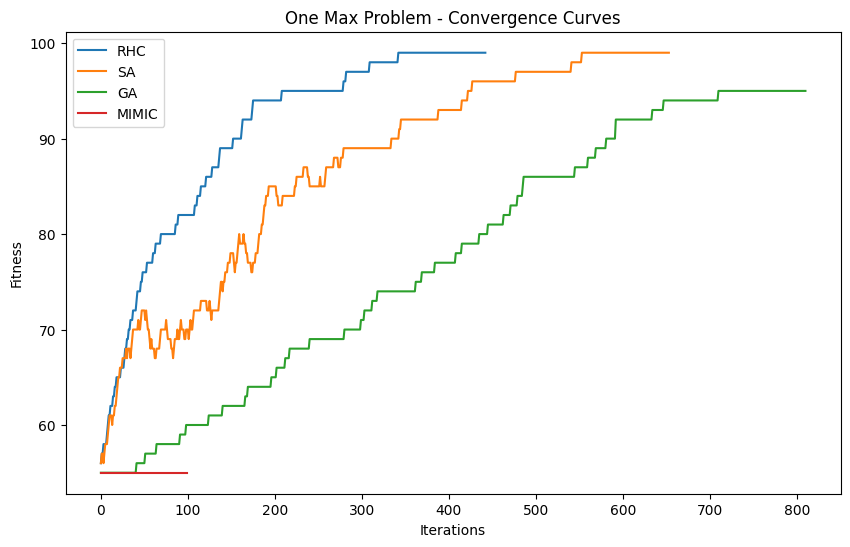

In [5]:
# Defining the One Max fitness function and optimization problem
fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

# Optimization algorithm parameters
max_iters = 1000
max_attempts = 100

# Random Hill Climb
best_state_rhc, best_fitness_rhc, curve_rhc = mlrose_hiive.random_hill_climb(problem,
                                                                             max_attempts=max_attempts,
                                                                             max_iters=max_iters,
                                                                             curve=True,
                                                                             random_state=1)
print('RHC Best Fitness:', best_fitness_rhc)

# Simulated Annealing
schedule = mlrose_hiive.ExpDecay()
best_state_sa, best_fitness_sa, curve_sa = mlrose_hiive.simulated_annealing(problem,
                                                                             schedule=schedule,
                                                                             max_attempts=max_attempts,
                                                                             max_iters=max_iters,
                                                                             curve=True,
                                                                             random_state=1)
print('SA Best Fitness:', best_fitness_sa)

# Genetic Algorithm
best_state_ga, best_fitness_ga, curve_ga = mlrose_hiive.genetic_alg(problem,
                                                                    pop_size=5,
                                                                    mutation_prob=0.1,
                                                                    max_attempts=max_attempts,
                                                                    max_iters=max_iters,
                                                                    curve=True,
                                                                    random_state=1)
print('GA Best Fitness:', best_fitness_ga)

# MIMIC
best_state_mimic, best_fitness_mimic, curve_mimic = mlrose_hiive.mimic(problem,
                                                                       pop_size=5,
                                                                       keep_pct=0.2,
                                                                       max_attempts=max_attempts,
                                                                       max_iters=max_iters,
                                                                       curve=True,
                                                                       random_state=1)
print('MIMIC Best Fitness:', best_fitness_mimic)

# Plotting the convergence curves
plt.figure(figsize=(10, 6))
plt.plot(curve_rhc[:, 0], label='RHC')
plt.plot(curve_sa[:, 0], label='SA')
plt.plot(curve_ga[:, 0], label='GA')
plt.plot(curve_mimic[:, 0], label='MIMIC')
plt.title('One Max Problem - Convergence Curves')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()

RHC Best Fitness: 39.0
SA Best Fitness: 43.0
GA Best Fitness: 47.0
MIMIC Best Fitness: 47.0


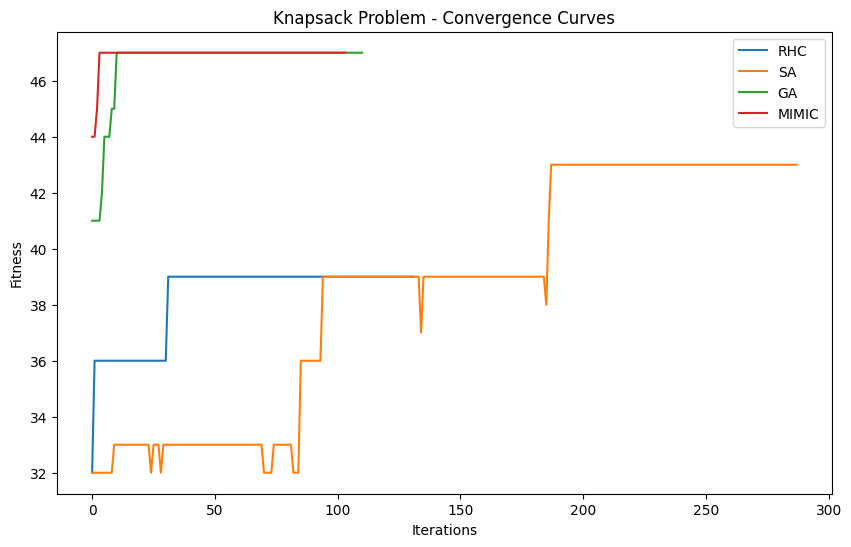

In [13]:
# Define the Knapsack problem
# Set up a list of weights and values for the items in the knapsack
weights = [10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
max_weight_pct = 0.6  # The max weight percent of the knapsack capacity

# Initialize fitness function using the weights and values
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct=max_weight_pct)

# Define the optimization problem object
problem = mlrose_hiive.DiscreteOpt(length=len(weights), fitness_fn=fitness, maximize=True, max_val=2)

# Optimization algorithm parameters
max_iters = 1000
max_attempts = 100

# Random Hill Climb
best_state_rhc, best_fitness_rhc, curve_rhc = mlrose_hiive.random_hill_climb(problem,
                                                                             max_attempts=max_attempts,
                                                                             max_iters=max_iters,
                                                                             curve=True,
                                                                             random_state=1)
print('RHC Best Fitness:', best_fitness_rhc)

# Simulated Annealing
schedule = mlrose_hiive.ExpDecay()
best_state_sa, best_fitness_sa, curve_sa = mlrose_hiive.simulated_annealing(problem,
                                                                             schedule=schedule,
                                                                             max_attempts=max_attempts,
                                                                             max_iters=max_iters,
                                                                             curve=True,
                                                                             random_state=1)
print('SA Best Fitness:', best_fitness_sa)

# Genetic Algorithm
best_state_ga, best_fitness_ga, curve_ga = mlrose_hiive.genetic_alg(problem,
                                                                    pop_size=40,
                                                                    mutation_prob=0.1,
                                                                    max_attempts=max_attempts,
                                                                    max_iters=max_iters,
                                                                    curve=True,
                                                                    random_state=1)
print('GA Best Fitness:', best_fitness_ga)

# MIMIC
best_state_mimic, best_fitness_mimic, curve_mimic = mlrose_hiive.mimic(problem,
                                                                       pop_size=40,
                                                                       keep_pct=0.2,
                                                                       max_attempts=max_attempts,
                                                                       max_iters=max_iters,
                                                                       curve=True,
                                                                       random_state=1)
print('MIMIC Best Fitness:', best_fitness_mimic)

# Plotting the convergence curves
plt.figure(figsize=(10, 6))
plt.plot(curve_rhc[:, 0], label='RHC')
plt.plot(curve_sa[:, 0], label='SA')
plt.plot(curve_ga[:, 0], label='GA')
plt.plot(curve_mimic[:, 0], label='MIMIC')
plt.title('Knapsack Problem - Convergence Curves')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()


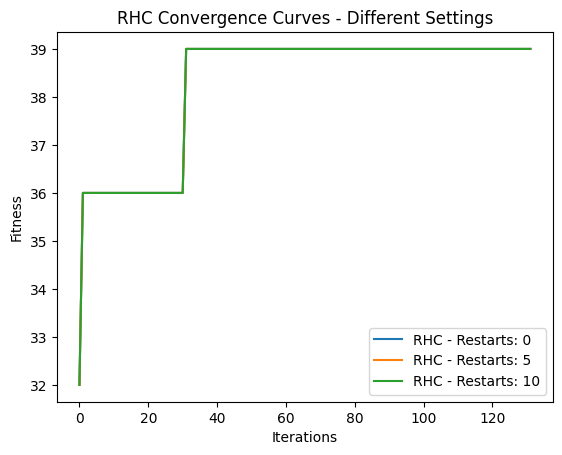

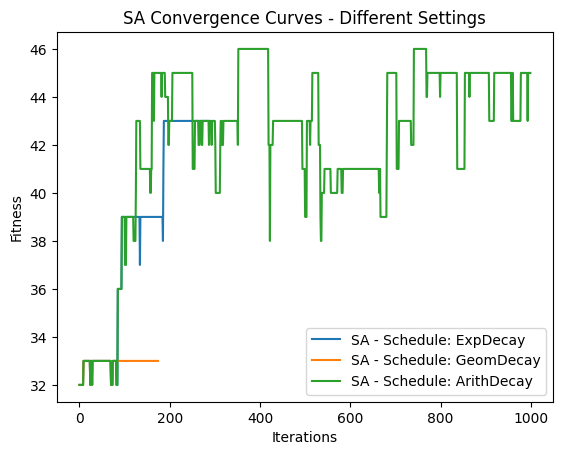

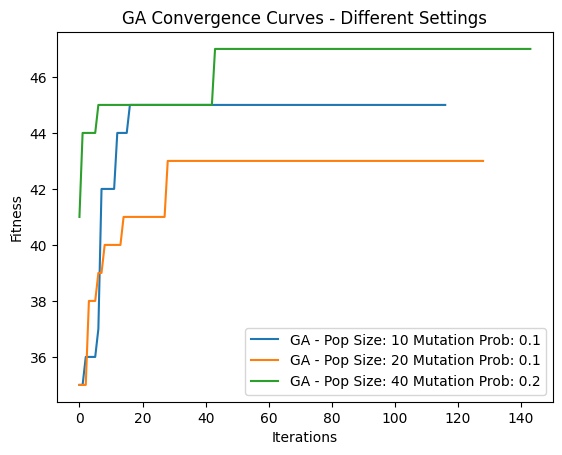

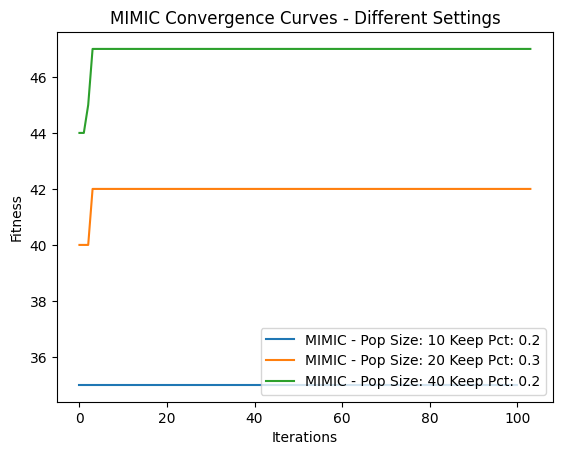

In [15]:
# Plotting function similar to the one provided
def plot_convergence_curves(problem, algorithm, param_grid, max_iters=1000, max_attempts=100):
    plt.figure()

    for params in param_grid:
        # Copy the problem instance
        problem_copy = mlrose_hiive.DiscreteOpt(length=problem.length,
                                                fitness_fn=problem.fitness_fn,
                                                maximize=problem.maximize,
                                                max_val=problem.max_val)
       
        # Apply algorithm and parameters
        if algorithm == 'rhc':
            _, _, curve = mlrose_hiive.random_hill_climb(problem_copy,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         restarts=params['restarts'],
                                                         curve=True,
                                                         random_state=params['random_state'])
            label = f"RHC - Restarts: {params['restarts']}"
           
        elif algorithm == 'sa':
            _, _, curve = mlrose_hiive.simulated_annealing(problem_copy,
                                                           max_attempts=max_attempts,
                                                           max_iters=max_iters,
                                                           schedule=params['schedule'],
                                                           curve=True,
                                                           random_state=params['random_state'])
            label = f"SA - Schedule: {params['schedule'].__class__.__name__}"
           
        elif algorithm == 'ga':
            _, _, curve = mlrose_hiive.genetic_alg(problem_copy,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   pop_size=params['pop_size'],
                                                   mutation_prob=params['mutation_prob'],
                                                   curve=True,
                                                   random_state=params['random_state'])
            label = f"GA - Pop Size: {params['pop_size']} Mutation Prob: {params['mutation_prob']}"
           
        elif algorithm == 'mimic':
            _, _, curve = mlrose_hiive.mimic(problem_copy,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             pop_size=params['pop_size'],
                                             keep_pct=params['keep_pct'],
                                             curve=True,
                                             random_state=params['random_state'])
            label = f"MIMIC - Pop Size: {params['pop_size']} Keep Pct: {params['keep_pct']}"
       
        # Plot convergence curve
        plt.plot(curve[:, 0], label=label)

    plt.title(f'{algorithm.upper()} Convergence Curves - Different Settings')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()

# Parameter settings for each algorithm
rhc_param_grid = [{'restarts': r, 'random_state': 1} for r in [0, 5, 10]]
sa_param_grid = [{'schedule': s, 'random_state': 1} for s in [mlrose_hiive.ExpDecay(), mlrose_hiive.GeomDecay(), mlrose_hiive.ArithDecay()]]
ga_param_grid = [{'pop_size': p, 'mutation_prob': mp, 'random_state': 1} for p, mp in [(10, 0.1), (20, 0.1), (40, 0.2)]]
mimic_param_grid = [{'pop_size': p, 'keep_pct': kp, 'random_state': 1} for p, kp in [(10, 0.2), (20, 0.3), (40, 0.2)]]

# Plot convergence curves for each algorithm
plot_convergence_curves(problem, 'rhc', rhc_param_grid)
plot_convergence_curves(problem, 'sa', sa_param_grid)
plot_convergence_curves(problem, 'ga', ga_param_grid)
plot_convergence_curves(problem, 'mimic', mimic_param_grid)

rhc
sa
ga


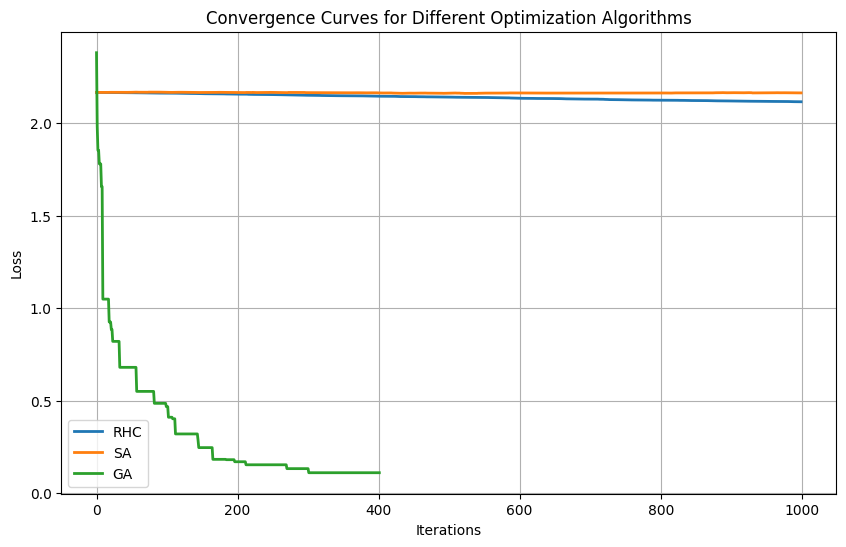

In [2]:
# 加载数据集
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 初始化记录收敛曲线的列表
fitness_curves = {}

# 对每个算法进行修改，以记录训练过程中的适应度历史
algorithms = ['rhc', 'sa', 'ga']
for alg in algorithms:
    print(alg)
    if alg == 'rhc':
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                              algorithm='random_hill_climb', max_iters=1000,
                                              bias=True, is_classifier=True, learning_rate=0.001,
                                              early_stopping=True, clip_max=5, max_attempts=100,
                                              curve=True, random_state=42)
    elif alg == 'sa':
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                              algorithm='simulated_annealing', max_iters=1000,
                                              bias=True, is_classifier=True, learning_rate=0.001,
                                              early_stopping=True, clip_max=5, max_attempts=100,
                                              curve=True, schedule=mlrose_hiive.ExpDecay(), random_state=42)
    elif alg == 'ga':
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                              algorithm='genetic_alg', max_iters=1000,
                                              bias=True, is_classifier=True, learning_rate=0.001,
                                              early_stopping=True, clip_max=5, max_attempts=100,
                                              curve=True, pop_size=200, mutation_prob=0.1, random_state=42)
    
    # 训练模型并记录适应度历史
    nn_model.fit(X_train_scaled, y_train)
    fitness_curves[alg] = nn_model.fitness_curve

# 绘制收敛曲线
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(fitness_curves[alg][:, 0], label=alg.upper(), linewidth=2)  # 注意: 我们取适应度值的相反数来表示损失

plt.title('Convergence Curves for Different Optimization Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

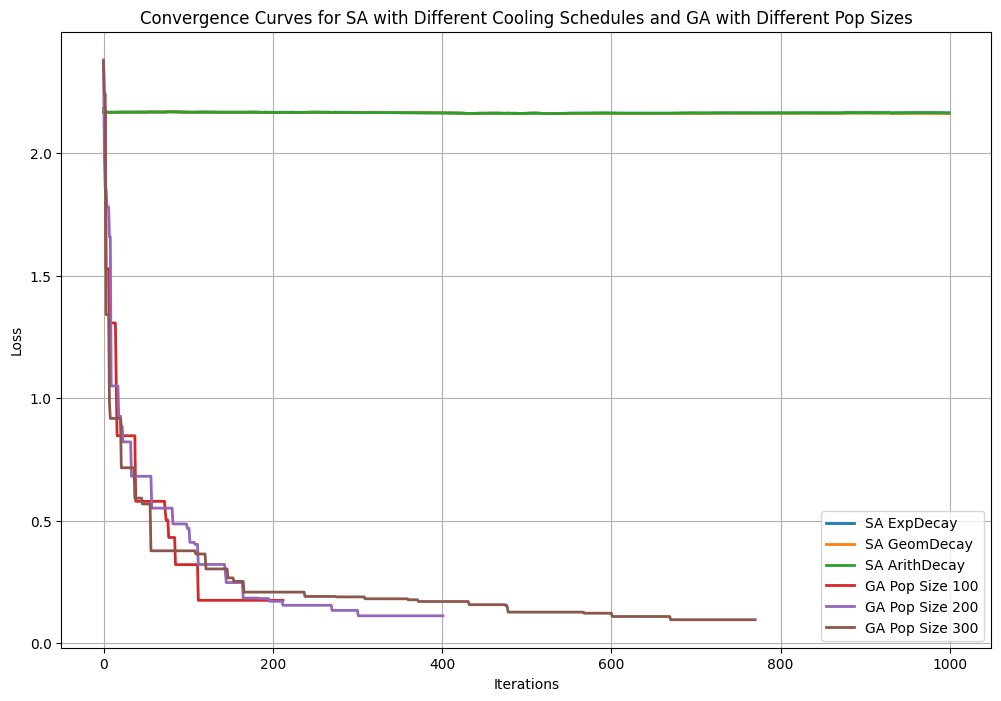

In [3]:
# 定义SA的不同冷却计划
cooling_schedules = {
    'ExpDecay': mlrose_hiive.ExpDecay(),
    'GeomDecay': mlrose_hiive.GeomDecay(),
    'ArithDecay': mlrose_hiive.ArithDecay()
}

# 定义GA的不同种群大小
pop_sizes = [100, 200, 300]

# 记录SA的收敛曲线
plt.figure(figsize=(12, 8))
for name, schedule in cooling_schedules.items():
    nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                             algorithm='simulated_annealing', max_iters=1000,
                                             bias=True, is_classifier=True, learning_rate=0.001,
                                             early_stopping=True, clip_max=5, max_attempts=100,
                                             curve=True, schedule=schedule, random_state=42)
    nn_model_sa.fit(X_train_scaled, y_train)
    plt.plot(nn_model_sa.fitness_curve[:, 0], label=f'SA {name}', linewidth=2)

# 记录GA的收敛曲线
for pop_size in pop_sizes:
    nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                             algorithm='genetic_alg', max_iters=1000,
                                             bias=True, is_classifier=True, learning_rate=0.001,
                                             early_stopping=True, clip_max=5, max_attempts=100,
                                             curve=True, pop_size=pop_size, mutation_prob=0.1, random_state=42)
    nn_model_ga.fit(X_train_scaled, y_train)
    plt.plot(nn_model_ga.fitness_curve[:, 0], label=f'GA Pop Size {pop_size}', linewidth=2)

plt.title('Convergence Curves for SA with Different Cooling Schedules and GA with Different Pop Sizes')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()